In [11]:

from __future__ import division, print_function, absolute_import

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

In [72]:
import pickle
embeddings_file = open("./output/yeast/embeddings_0.2_1_0.pkl", 'rb')
embeddings = pickle.load(embeddings_file)
embeddings_file.close()
from sklearn import preprocessing
normalizer = preprocessing.Normalizer()
vectors =  normalizer.fit_transform(embeddings, 'l2')

In [65]:


# Training Parameters
learning_rate = 0.05
num_steps = 30000
batch_size = 512

display_step = 1000
examples_to_show = 10

In [66]:

# Network Parameters
num_hidden_1 = 32 # 1st layer num features
num_hidden_2 = 2 # 2nd layer num features (the latent dim)
num_input = 128 # MNIST data input (img shape: 28*28)


In [67]:

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, num_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([num_input])),
}

# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1'])
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2'])
    return layer_2


# Building the decoder
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1'])
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2'])
    return layer_2


In [68]:

# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X



In [69]:
# Define loss and optimizer, minimize the squared error
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()


In [73]:

# Start Training
# Start a new TF session
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Training
    for i in range(1, num_steps+1):
        # Prepare Data
        ind = random.sample(range(len(vectors)), batch_size)
        batch_xs = embeddings[ind]
        # Prepare Data
        # Run optimization op (backprop) and cost op (to get loss value)
        _, l = sess.run([optimizer, loss], feed_dict={X: batch_xs})
        # Display logs per step
        if i % display_step == 0 or i == 1:
            print('Step %i: Minibatch Loss: %f' % (i, l))

Step 1: Minibatch Loss: 521629.281250
Step 1000: Minibatch Loss: 31.937441
Step 2000: Minibatch Loss: 2.018794
Step 3000: Minibatch Loss: 2.380831
Step 4000: Minibatch Loss: 2.053524
Step 5000: Minibatch Loss: 2.803774
Step 6000: Minibatch Loss: 1.796027
Step 7000: Minibatch Loss: 1.815674
Step 8000: Minibatch Loss: 2.013370
Step 9000: Minibatch Loss: 5.198648
Step 10000: Minibatch Loss: 2.158564
Step 11000: Minibatch Loss: 1.933344
Step 12000: Minibatch Loss: 2.240953
Step 13000: Minibatch Loss: 12.452936
Step 14000: Minibatch Loss: 2.515395
Step 15000: Minibatch Loss: 1.848842
Step 16000: Minibatch Loss: 1.918109
Step 17000: Minibatch Loss: 2.125423
Step 18000: Minibatch Loss: 1.843376
Step 19000: Minibatch Loss: 2.050087
Step 20000: Minibatch Loss: 2.915829
Step 21000: Minibatch Loss: 1.867432
Step 22000: Minibatch Loss: 2.508296
Step 23000: Minibatch Loss: 2.433076
Step 24000: Minibatch Loss: 2.361409
Step 25000: Minibatch Loss: 2.693169
Step 26000: Minibatch Loss: 1.817390
Step 27

In [51]:
with tf.Session() as sess:# Run the initializer
    sess.run(init)
    g = sess.run(encoder_op, feed_dict={X: vectors})

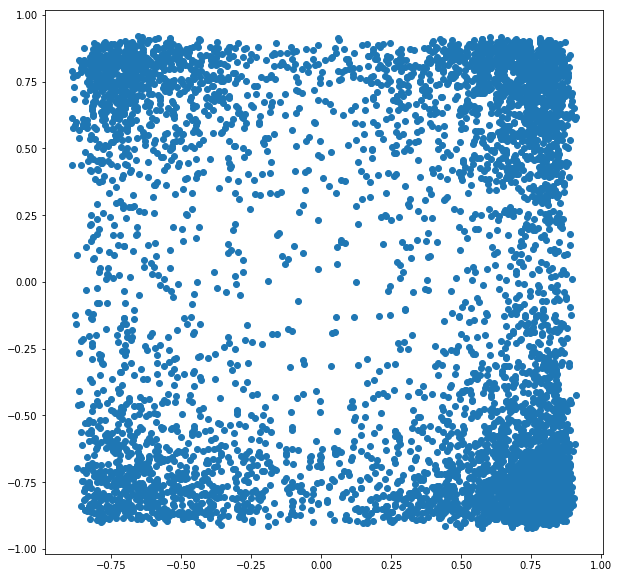

In [55]:
fig, ax = plt.subplots()
fig.set_tight_layout(False)
fig.set_size_inches(10, 10)
ax.scatter(g[:,0], g[:,1], label='some graph')
plt.show()

array([-0.76622492,  0.8076092 , -0.59442294, ..., -0.78349972,
        0.89230633, -0.74850053], dtype=float32)